In [1]:
import matplotlib as mpl
mpl.use("Agg")
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import numpy as np
from qutip import *

In [2]:
N = 20

Ej1 = 27.0*2*np.pi
Ej2 = 20.1*2*np.pi
Ec1 = 0.3*2*np.pi
Ec2 = 0.3*2*np.pi
g1 = 0.101*2*np.pi
g2 = 0.127*2*np.pi
wR = 9.16*2*np.pi

wQ1 = np.sqrt(8*Ej1*Ec1) - Ec1
wQ2 = np.sqrt(8*Ej2*Ec2) - Ec2
B1 = Ec1
B2 = Ec2

D1 = wQ1 - wR
D2 = wQ2 - wR
Th1 = g1/D1
Th2 = g2/D2

wr1 = wR*(np.cos(Th1)**2) + wQ1*(np.sin(Th1)**2) - g1*np.sin(2*Th1)
wq1 = wR*(np.sin(Th1)**2) + wQ1*(np.cos(Th1)**2) + g1*np.sin(2*Th1)

xqr = (B1/2)*(np.sin(2*Th1)**2)
xqq = (B1)*(np.cos(Th1)**4)
xrr = B1*(np.sin(Th1)**4)

In [3]:
c = tensor(destroy(N),qeye(2))
q1 = tensor(qeye(N),destroy(2))


a1 = np.cos(Th1)*c - np.sin(Th1)*q1
b1 = np.sin(Th1)*c + np.cos(Th1)*q1

H = wr1*a1.dag()*a1 + wq1*b1.dag()*b1 - (xqq/2)*b1.dag()*b1.dag()*b1*b1 - xqr*a1.dag()*a1*b1.dag()*b1 - (xrr/2)*a1.dag()*a1*a1.dag()*a1

In [4]:
def plot_wigner_2d(psi):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(8, 8))
    
    ax = fig.add_subplot(1, 1, 1)
    plot_wigner(psi, fig=fig, ax=ax, alpha_max=3);
    
    plt.close(fig)
    return fig

In [5]:
tlist = np.linspace(0,25,50000)
psi0=tensor(coherent(N,1),(basis(2,0)+basis(2,1)).unit())

In [6]:
output = mesolve(H, psi0, tlist, [], [])

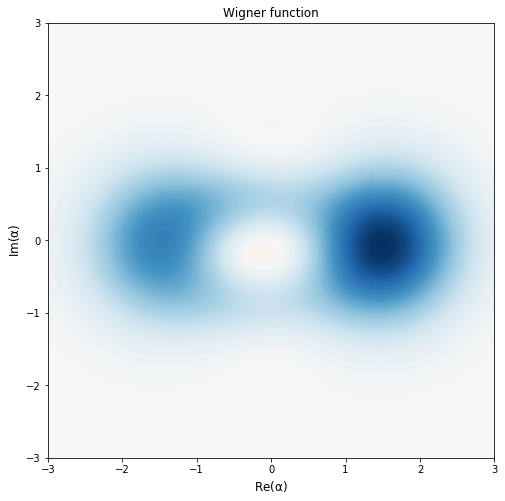

In [51]:
psi = ptrace(output.states[-38],0) #24.98100ns
plot_wigner_2d(psi)

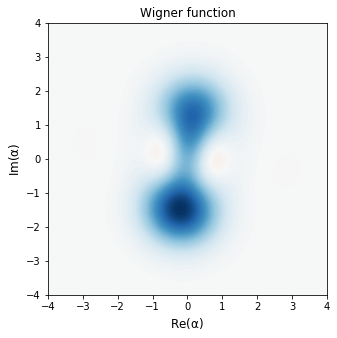

In [54]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure(figsize=(5, 5))
    
ax = fig.add_subplot(1, 1, 1)

with writer.saving(fig, "writer_test.mp4", 60):
    for i in range(60):
        plot_wigner(ptrace(output.states[i*833],0), fig=fig, ax=ax, alpha_max=4);
        writer.grab_frame()

In [57]:
print((B1/2)*(np.sin(2*Th1)**2))
print((B2/2)*(np.sin(2*Th2)**2))
print((B2)*(np.sin(2*Th2)**2))

0.0192073495192
0.00958425491828
0.0191685098366


In [76]:
ptrace(b1.dag()*b1,1)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[  0.9730154    0.        ]
 [  0.          20.87059273]]